In [1]:
#Load Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Load Dataset
dataset = pd.read_csv(r'C:\Python\HousingClean1.csv')
dataset.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
1,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
2,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished
3,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
4,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished


In [3]:
#Show Key Statistics
dataset.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.290000e+02,529.000000,529.000000,529.000000,529.000000,529.000000
mean,4.592158e+06,5058.610586,2.941399,1.258979,1.788280,0.663516
std,1.585562e+06,2076.332676,0.729756,0.463681,0.861956,0.843992
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3540.000000,2.000000,1.000000,1.000000,0.000000
50%,4.270000e+06,4500.000000,3.000000,1.000000,2.000000,0.000000
75%,5.600000e+06,6300.000000,3.000000,1.000000,2.000000,1.000000
max,9.100000e+06,15600.000000,6.000000,3.000000,4.000000,3.000000


In [5]:
dataset=pd.get_dummies(dataset)

In [7]:
#Covariance test - Levene Test
# p <= alpha(0.05): reject H0, not the same covariance.
# p > alpha(0.05): fail to reject H0, same covariance.
import scipy.stats as stats
names=dataset.get('mainroad_yes')
cnt=1
for col in dataset.columns:
    if (col == 'mainroad_yes'):
        continue
    stat, p = stats.levene(dataset[col][dataset['mainroad_yes'] == names[0]],
                          dataset[col][dataset['mainroad_yes'] == names[1]])
    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Covariance the Same (fail to reject H0)')
        print('\n')
    else:
            print('Covariance different(reject H0)')
            print('\n')
    cnt +=1 

price
Statistics=24.267, p=0.000
Covariance different(reject H0)


area
Statistics=20.685, p=0.000
Covariance different(reject H0)


bedrooms
Statistics=2.215, p=0.137
Covariance the Same (fail to reject H0)


bathrooms
Statistics=0.266, p=0.606
Covariance the Same (fail to reject H0)


stories
Statistics=4.501, p=0.034
Covariance different(reject H0)


parking
Statistics=21.424, p=0.000
Covariance different(reject H0)


mainroad_no
Statistics=nan, p=nan
Covariance different(reject H0)


guestroom_no
Statistics=4.341, p=0.038
Covariance different(reject H0)


guestroom_yes
Statistics=4.341, p=0.038
Covariance different(reject H0)


basement_no
Statistics=0.887, p=0.347
Covariance the Same (fail to reject H0)


basement_yes
Statistics=0.887, p=0.347
Covariance the Same (fail to reject H0)


hotwaterheating_no
Statistics=0.155, p=0.694
Covariance the Same (fail to reject H0)


hotwaterheating_yes
Statistics=0.155, p=0.694
Covariance the Same (fail to reject H0)


airconditioning_no
Stati

C:\Users\juman\PythonData1200\lib\site-packages\scipy\stats\morestats.py:2439: RuntimeWarning: invalid value encountered in double_scalars
  W = numer / denom


In [10]:
#Normality test - Shapiro-Wilk Test
# p <= alpha(0.05): reject H0, not normal.
# p > alpha(0.05): fail to reject H0, normal.

from scipy.stats import shapiro

cnt=1
for col in dataset.columns:
    if (col=='mainroad_yes'):
        continue
        
    stat, p = shapiro(dataset[col])

    print(col)
    print('Statistics=%.3f, p=%.3f' % (stat, p))
    # interpret
    alpha = 0.05
    if p > alpha:
        print('Sample looks Gaussian (fail to reject H0)')
        print('\n')
    else:
        print('Sample does not look Gaussian (reject H0)')
        print('\n')
    cnt +=1 

price
Statistics=0.959, p=0.000
Sample does not look Gaussian (reject H0)


area
Statistics=0.919, p=0.000
Sample does not look Gaussian (reject H0)


bedrooms
Statistics=0.823, p=0.000
Sample does not look Gaussian (reject H0)


bathrooms
Statistics=0.558, p=0.000
Sample does not look Gaussian (reject H0)


stories
Statistics=0.770, p=0.000
Sample does not look Gaussian (reject H0)


parking
Statistics=0.740, p=0.000
Sample does not look Gaussian (reject H0)


mainroad_no
Statistics=0.420, p=0.000
Sample does not look Gaussian (reject H0)


guestroom_no
Statistics=0.459, p=0.000
Sample does not look Gaussian (reject H0)


guestroom_yes
Statistics=0.459, p=0.000
Sample does not look Gaussian (reject H0)


basement_no
Statistics=0.601, p=0.000
Sample does not look Gaussian (reject H0)


basement_yes
Statistics=0.601, p=0.000
Sample does not look Gaussian (reject H0)


hotwaterheating_no
Statistics=0.204, p=0.000
Sample does not look Gaussian (reject H0)


hotwaterheating_yes
Statistics=

In [11]:
#Create x and y variables
x = dataset.drop('mainroad_yes', axis=1).to_numpy()
Y = dataset['mainroad_yes'].to_numpy()

#Create Train and Test Dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,Y,test_size = 0.2,stratify=Y,random_state = 100)

#Fix the imbalanced Classes
from imblearn.over_sampling import SMOTE
smt=SMOTE(random_state=100)
x_train_smt,y_train_smt = smt.fit_resample(x_train,y_train)

#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = sc.fit_transform(x_train_smt)
x_test2 = sc.transform(x_test)

#Models
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [13]:
#Base LDA, QDA and Logistical Regression Model
from sklearn.metrics import classification_report, confusion_matrix  

for name,method in [('LDA', LinearDiscriminantAnalysis()),('QDA',QuadraticDiscriminantAnalysis()),
                   ('LogReg',LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))]: 
    method.fit(x_train2,y_train_smt)
    predict = method.predict(x_test2)
    print('\nEstimator: {}'.format(name)) 
    print(confusion_matrix(y_test,predict))  
    print(classification_report(y_test,predict))




Estimator: LDA
[[ 4 11]
 [ 7 84]]
              precision    recall  f1-score   support

           0       0.36      0.27      0.31        15
           1       0.88      0.92      0.90        91

    accuracy                           0.83       106
   macro avg       0.62      0.59      0.61       106
weighted avg       0.81      0.83      0.82       106


Estimator: QDA
[[15  0]
 [ 0 91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        91

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106


Estimator: LogReg
[[15  0]
 [ 0 91]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        91

    accuracy                           1.00       106
   macro avg       1

C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


In [14]:
#Construct some pipelines 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Create Pipeline

pipeline =[]

pipe_lda = Pipeline([('scl', StandardScaler()),
                    ('clf', LinearDiscriminantAnalysis())])
pipeline.insert(0,pipe_lda)

pipe_qda = Pipeline([('scl', StandardScaler()),
                    ('clf', QuadraticDiscriminantAnalysis())])
pipeline.insert(1,pipe_qda)

pipe_logreg = Pipeline([('scl', StandardScaler()),
                    ('clf', LogisticRegression(solver='lbfgs',
                                               class_weight='balanced',
                                               random_state=100))])   
pipeline.insert(2,pipe_logreg)
    
    
# Set grid search params 

modelpara =[]

param_gridlda = {'clf__solver':['svd','lsqr','eigen']}
modelpara.insert(0,param_gridlda)

param_gridqda = {}
modelpara.insert(1,param_gridqda)

param_gridlogreg = {'clf__C': [0.01, 0.1, 1, 10, 100], 
                    'clf__penalty': ['l2']}
modelpara.insert(2,param_gridlogreg)

In [15]:
#Define Plot for learning curve

from sklearn.model_selection import learning_curve

def plot_learning_curves(model):
    train_sizes, train_scores, test_scores = learning_curve(estimator=model,
                                                            X=x_train_smt, 
                                                            y=y_train_smt,
                                                            train_sizes= np.linspace(0.1, 1.0, 10),
                                                            cv=10,
                                                            scoring='recall_weighted',random_state=100)
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    
    plt.plot(train_sizes, train_mean,color='blue', marker='o', 
             markersize=5, label='training recall')
    plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std,
                     alpha=0.15, color='blue')

    plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5,
             label='validation recall')
    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std,
                     alpha=0.15, color='green')
    plt.grid(True)
    plt.xlabel('Number of training samples')
    plt.ylabel('Recall')
    plt.legend(loc='best')
    plt.ylim([0.6, 1.0])
    plt.show()

LDA Learning Curve


C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:480: RuntimeWarning: invalid value encountered in true_divide
  self.explained_variance_ratio_ = (S**2 / np.sum(


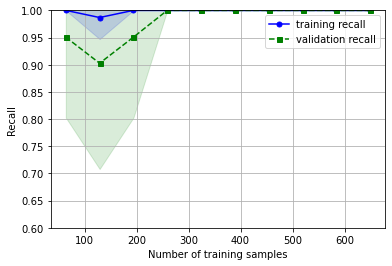


 QDA Learning Curve


C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py", line 782, in fit
    raise ValueError('The number of classes has to be greater than'
ValueError: The number of classes has to be greater than one; got 1 class

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py:610: 

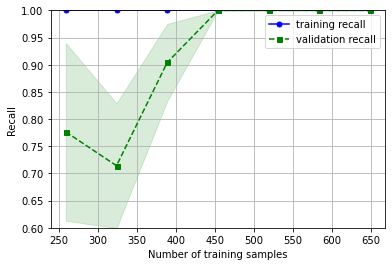


 Logistic Regression Learning Curve


C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\linear_model\_logistic.py", line 1374, in fit
    raise ValueError("This solver needs samples of at least 2 classes"
ValueError: This solver needs samples of at least 2 classes in the data, but the data contains only one class: 1

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\juman\PythonData1200\lib\site-packages\

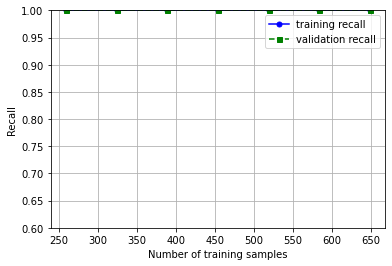

In [16]:
#Plot Learning Curve
print('LDA Learning Curve')
plot_learning_curves(pipe_lda)
print('\n QDA Learning Curve')
plot_learning_curves(pipe_qda)
print('\n Logistic Regression Learning Curve')
plot_learning_curves(pipe_logreg)



Model Evaluation - Recall Score
LDA 1.00 +/- 0.00


C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\U

QDA 1.00 +/- 0.01
Log Reg 1.00 +/- 0.00




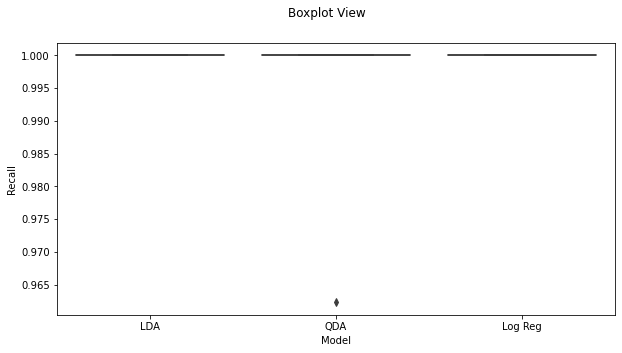

In [17]:
#Model Analysis
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score

models=[]
models.append(('LDA',pipe_lda))
models.append(('QDA',pipe_qda))
models.append(('Log Reg',pipe_logreg))

#Model Evaluation
results =[]
names=[]
scoring ='recall_weighted'
print('Model Evaluation - Recall Score')
for name, model in models:
    rkf=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
    cv_results = cross_val_score(model,x,Y,cv=rkf,scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print('{} {:.2f} +/- {:.2f}'.format(name,cv_results.mean(),cv_results.std()))
print('\n') 

fig = plt.figure(figsize=(10,5))
fig.suptitle('Boxplot View')
ax = fig.add_subplot(111)
sns.boxplot(data=results)
ax.set_xticklabels(names)
plt.ylabel('Recall')
plt.xlabel('Model')
plt.show()

In [18]:
#Define Gridsearch Function

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix  

def Gridsearch_cv(model, params):
    
    #Cross-validation Function
    cv2=RepeatedKFold(n_splits=10, n_repeats=5, random_state=100)
        
    #GridSearch CV
    gs_clf = GridSearchCV(model, params, cv=cv2,scoring='recall_weighted')
    gs_clf = gs_clf.fit(x_train_smt, y_train_smt)
    model = gs_clf.best_estimator_
    
    # Use best model and test data for final evaluation
    y_pred = model.predict(x_test)

    #Identify Best Parameters to Optimize the Model
    bestpara=str(gs_clf.best_params_)
    
    #Output Validation Statistics
    target_names=['mainroad yes','mainroad no']
    print('\nOptimized Model')
    print('\nModel Name:',str(pipeline.named_steps['clf']))
    print('\nBest Parameters:',bestpara)
    print('\n', confusion_matrix(y_test,y_pred))  
    print('\n',classification_report(y_test,y_pred,target_names=target_names)) 
        
    #Transform the variables into binary (0,1) - ROC Curve
    from sklearn import preprocessing
    Forecast1=pd.DataFrame(y_pred)
    Outcome1=pd.DataFrame(y_test)
    lb1 = preprocessing.LabelBinarizer()
    OutcomeB1 =lb1.fit_transform(Outcome1)
    ForecastB1 = lb1.fit_transform(Forecast1)
    
    #Setup the ROC Curve
    from sklearn.metrics import roc_curve, auc
    from sklearn import metrics
    fpr, tpr, threshold = metrics.roc_curve(OutcomeB1, ForecastB1)
    roc_auc = metrics.auc(fpr, tpr)
    print('ROC Curve')
    #Plot the ROC Curve
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()


C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\model_selection\_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\pipeline.py", line 346, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py", line 558, in fit
    self._solve_eigen(X, y,
  File "C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py", line 419, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "C:\Users\juman\PythonData1200\lib\site-packages\scipy\linalg\decomp.py", line 578, in eigh
    raise LinAlgError


Optimized Model

Model Name: LinearDiscriminantAnalysis()

Best Parameters: {'clf__solver': 'svd'}

 [[ 4 11]
 [ 7 84]]

               precision    recall  f1-score   support

mainroad yes       0.36      0.27      0.31        15
 mainroad no       0.88      0.92      0.90        91

    accuracy                           0.83       106
   macro avg       0.62      0.59      0.61       106
weighted avg       0.81      0.83      0.82       106

ROC Curve


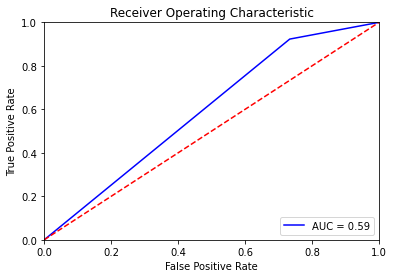

C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\juman\PythonData1200\lib\site-packages\sklearn\discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\U


Optimized Model

Model Name: QuadraticDiscriminantAnalysis()

Best Parameters: {}

 [[15  0]
 [ 0 91]]

               precision    recall  f1-score   support

mainroad yes       1.00      1.00      1.00        15
 mainroad no       1.00      1.00      1.00        91

    accuracy                           1.00       106
   macro avg       1.00      1.00      1.00       106
weighted avg       1.00      1.00      1.00       106

ROC Curve


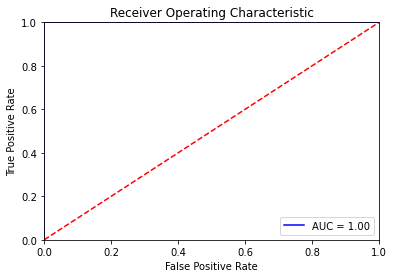


Optimized Model

Model Name: LogisticRegression(class_weight='balanced', random_state=100)

Best Parameters: {'clf__C': 0.01, 'clf__penalty': 'l2'}

 [[14  1]
 [ 0 91]]

               precision    recall  f1-score   support

mainroad yes       1.00      0.93      0.97        15
 mainroad no       0.99      1.00      0.99        91

    accuracy                           0.99       106
   macro avg       0.99      0.97      0.98       106
weighted avg       0.99      0.99      0.99       106

ROC Curve


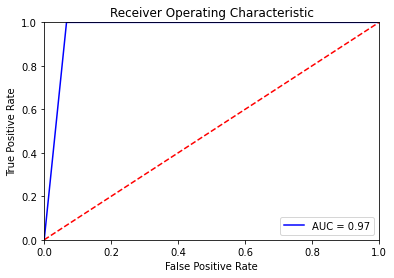

In [19]:
#Run Models

for pipeline, modelpara in zip(pipeline,modelpara):
    Gridsearch_cv(pipeline,modelpara)